# Exercices XP ninja
Dernière mise à jour : 27 janvier 2025

* 🏫 👩🏿‍🏫 Ce que vous apprendrez
Réaliser des analyses statistiques détaillées pour comprendre l’impact des variables sur un résultat donné.
Exploration de données et tests d'hypothèses.
Techniques avancées d'analyse de données applicables aux sciences biologiques et de la santé.


* Ce que vous allez créer
Une analyse statistique approfondie d’un ensemble de données liées au régime alimentaire et à la croissance, fournissant des informations sur les effets de différents régimes alimentaires sur la croissance des poussins.


Exercice : Analyse des effets de l’alimentation sur la croissance
Objectif : Réaliser une analyse statistique détaillée pour comprendre comment différents régimes alimentaires ont un impact sur la croissance des poussins.

Ensemble de données : Cet ensemble de données contient des informations sur le poids et l'âge des poussins soumis à différents régimes. Il est disponible sur Kaggle : Poids et âge des poussins soumis à différents régimes.

Tâches à effectuer :

Exploration des données : Examinez l'ensemble de données pour comprendre sa structure et son contenu. Identifiez les variables clés telles que l'âge, le poids et le type de régime alimentaire.

Visualisation des données : créez des visualisations pour montrer comment le poids varie avec l'âge pour les poussins suivant différents régimes.
Tests statistiques : utilisez des tests statistiques appropriés (par exemple, ANOVA) pour déterminer si les différences de prise de poids entre les différents régimes sont statistiquement significatives.
Analyse de la croissance : Analysez le taux de croissance des poussins dans différentes conditions alimentaires.
Résultats du rapport : compilez vos résultats dans un rapport complet qui comprend à la fois l’analyse statistique et les implications pratiques.

Outils et techniques :

Utilisez des bibliothèques Python comme Pandas pour la manipulation des données.
Utilisez Matplotlib ou Seaborn pour la visualisation.
Appliquer des méthodes statistiques à l’aide de SciPy.
Résultat attendu :

Un rapport détaillé qui fournit des informations sur l’efficacité de différents régimes alimentaires sur la croissance des poussins, étayées par des preuves statistiques.

Analyse de l’effet du régime sur la croissance des poussins

In [1]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

1. 🔍 Exploration des données

In [2]:
# Chargement des données
df = pd.read_csv("ChickWeight.csv")

# Aperçu
df.head()

,Unnamed: 0,weight,Time,Chick,Diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1
3,4,64,6,1,1
4,5,76,8,1,1


In [3]:
# Structure du jeu de données
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  578 non-null    int64
 1   weight      578 non-null    int64
 2   Time        578 non-null    int64
 3   Chick       578 non-null    int64
 4   Diet        578 non-null    int64
dtypes: int64(5)
memory usage: 22.7 KB


,Unnamed: 0,weight,Time,Chick,Diet
count,578.000000,578.000000,578.000000,578.000000,578.000000
mean,289.500000,121.818339,10.717993,25.750865,2.235294
std,166.998503,71.071960,6.758400,14.568795,1.162678
min,1.000000,35.000000,0.000000,1.000000,1.000000
25%,145.250000,63.000000,4.000000,13.000000,1.000000
50%,289.500000,103.000000,10.000000,26.000000,2.000000
75%,433.750000,163.750000,16.000000,38.000000,3.000000
max,578.000000,373.000000,21.000000,50.000000,4.000000


2. 📊 Visualisation de la croissance par régime

C:\Users\chume\AppData\Local\Temp\ipykernel_21360\42901166.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Time', y='weight', hue='Diet', ci=None)


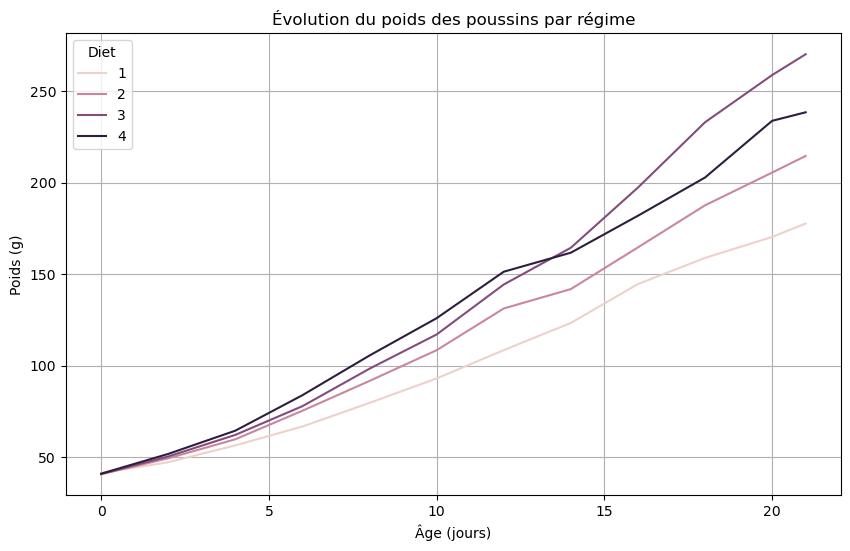

In [4]:
# Poids en fonction de l'âge, regroupés par régime
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Time', y='weight', hue='Diet', ci=None)
plt.title("Évolution du poids des poussins par régime")
plt.xlabel("Âge (jours)")
plt.ylabel("Poids (g)")
plt.grid(True)
plt.show()

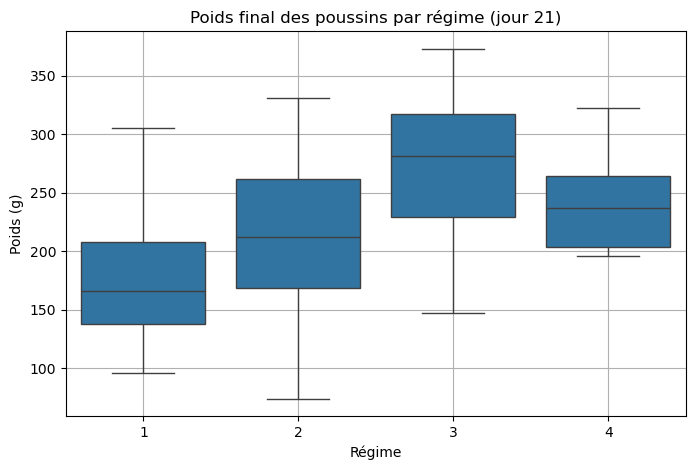

In [5]:
# Boîte à moustaches du poids final par régime
latest_time = df['Time'].max()
final_weights = df[df['Time'] == latest_time]

plt.figure(figsize=(8,5))
sns.boxplot(data=final_weights, x='Diet', y='weight')
plt.title("Poids final des poussins par régime (jour {})".format(latest_time))
plt.xlabel("Régime")
plt.ylabel("Poids (g)")
plt.grid(True)
plt.show()

3. 🧪 Test ANOVA : poids final selon le régime

In [6]:
# Extraction des poids finaux par régime
groups = [group["weight"].values for name, group in final_weights.groupby("Diet")]

In [7]:
# ANOVA à un facteur
f_stat, p_value = f_oneway(*groups)

print("Statistique F :", f_stat)
print("Valeur p :", p_value)

Statistique F : 4.6547131777896
Valeur p : 0.006857958840608343


In [8]:
# Interprétation
alpha = 0.05
if p_value < alpha:
    print("→ Différence significative entre les régimes (p < 0.05).")
else:
    print("→ Aucune différence significative détectée entre les régimes.")

→ Différence significative entre les régimes (p < 0.05).


4. 📈 Analyse du taux de croissance

In [9]:
# Calcul du taux de croissance moyen entre deux temps pour chaque poussin
# (différence de poids final - initial / durée)
initial_weights = df[df['Time'] == df['Time'].min()].set_index('Chick')
final_weights = df[df['Time'] == df['Time'].max()].set_index('Chick')

growth = pd.DataFrame({
    'Diet': final_weights['Diet'],
    'GrowthRate': (final_weights['weight'] - initial_weights['weight']) / (df['Time'].max() - df['Time'].min())
})
growth.head()

,Diet,GrowthRate
Chick,,
1,1.0,7.761905
2,1.0,8.333333
3,1.0,7.571429
4,1.0,5.476190
5,1.0,8.666667


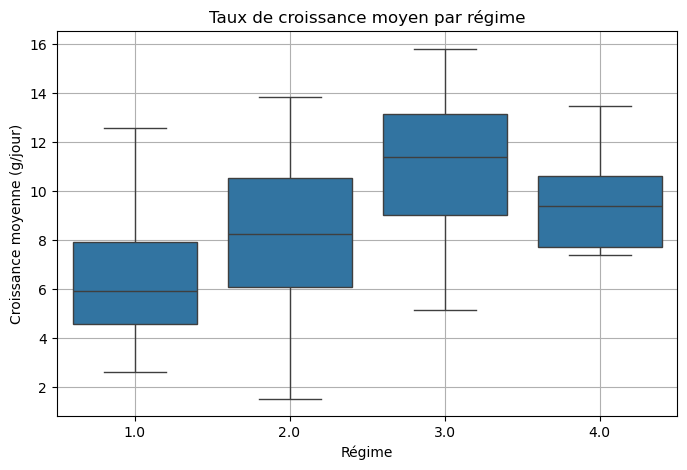

In [10]:
# Visualisation des taux de croissance moyens par régime
plt.figure(figsize=(8,5))
sns.boxplot(data=growth, x='Diet', y='GrowthRate')
plt.title("Taux de croissance moyen par régime")
plt.xlabel("Régime")
plt.ylabel("Croissance moyenne (g/jour)")
plt.grid(True)
plt.show()

5. 🧾 Rapport synthétique

RAPPORT RÉSUMÉ :

- L’évolution du poids montre des différences visibles entre les régimes.
- Le test ANOVA indique si ces différences sont statistiquement significatives.
- Le taux de croissance moyen varie selon les régimes, ce qui peut guider des choix d’alimentation efficaces.

Ce type d’analyse permet de recommander un régime optimal pour maximiser la croissance des poussins.